In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

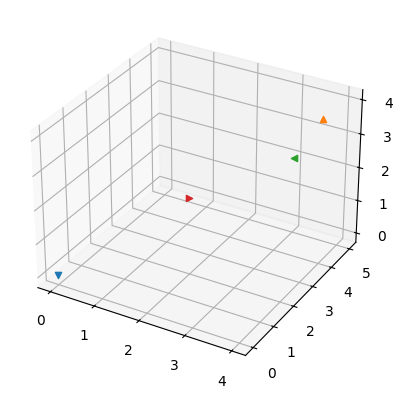

Расстояние между 1(v) и 2(^) точкой: 
 6.928203230275509 
 47.99999999999999 
 4.0 
 47.99999999999999 
 4.0 
 12.0

Расстояние между 1(v) и 3(<) точкой: 
 6.164414002968976 
 37.99999999999999 
 5.0 
 10.0

Расстояние между 1(v) и 4(>) точкой: 
 3.4641016151377544 
 11.999999999999998 
 2.0 
 6.0 


Расстояние между 2(^) и 3(<) точкой: 
 2.449489742783178 
 5.999999999999999 
 2.0 
 4.0

Расстояние между 2(^) и 4(>) точкой: 
 3.4641016151377544 
 11.999999999999998 
 2.0 
 6.0 


Расстояние между 3(^) и 4(>) точкой: 
 3.1622776601683795 
 10.000000000000002 
 3.0 
 4.0 



In [30]:
#1.3.1 Задание Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
#расстояния по описанным в примере выше метрикам. Отобразите точки
#в трехмерном пространстве.

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

point1 = ax.scatter(0,0,0, marker ="v")
point2 = ax.scatter(4,4,4, marker = "^")
point3 = ax.scatter(3,5,2, marker = "<")
point4 = ax.scatter(2,2,2, marker = ">")

x = np.array([0,0,0])
y = np.array([4,4,4])
z = np.array([3,5,2])
w = np.array([2,2,2])

plt.show()

print("Расстояние между 1(v) и 2(^) точкой:", '\n' ,
      np.linalg.norm(x-y), '\n',np.linalg.norm(x-y) ** 2,'\n',np.linalg.norm(x-y, ord = np.inf),'\n',
      np.linalg.norm(x-y) ** 2,'\n',np.linalg.norm(x-y, ord = np.inf),
      '\n',np.linalg.norm(x-y, ord=1))


print("\nРасстояние между 1(v) и 3(<) точкой:",'\n',
      np.linalg.norm(x-z),'\n',np.linalg.norm(x-z) ** 2,'\n',
      np.linalg.norm(x-z, ord = np.inf),'\n',
      np.linalg.norm(x-z, ord=1))

print("\nРасстояние между 1(v) и 4(>) точкой:",'\n',np.linalg.norm(x-w),'\n',
      np.linalg.norm(x-w) ** 2,'\n',
      np.linalg.norm(x-w, ord = np.inf),'\n',
      np.linalg.norm(x-w, ord=1),'\n')

print("\nРасстояние между 2(^) и 3(<) точкой:",'\n',np.linalg.norm(y-z),'\n',
      np.linalg.norm(y-z) ** 2,'\n',
      np.linalg.norm(y-z, ord = np.inf),'\n',
      np.linalg.norm(y-z, ord=1))

print("\nРасстояние между 2(^) и 4(>) точкой:",'\n',np.linalg.norm(y-w),'\n',
      np.linalg.norm(y-w) ** 2,'\n',
      np.linalg.norm(y-w, ord = np.inf),'\n',
      np.linalg.norm(y-w, ord=1),'\n',)


print("\nРасстояние между 3(^) и 4(>) точкой:",'\n',np.linalg.norm(w-z),'\n',
      np.linalg.norm(w-z) ** 2,'\n',
      np.linalg.norm(w-z, ord = np.inf),'\n',
      np.linalg.norm(w-z, ord=1),'\n')

     sepal_length  sepal_width  petal_length  petal_width
1             4.9          3.0           1.4          0.2
42            4.4          3.2           1.3          0.2
73            6.1          2.8           4.7          1.2
131           7.9          3.8           6.4          2.0
45            4.8          3.0           1.4          0.3
1          setosa
42         setosa
73     versicolor
131     virginica
45         setosa
Name: species, dtype: object
['versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor']
accuracy: 1.0


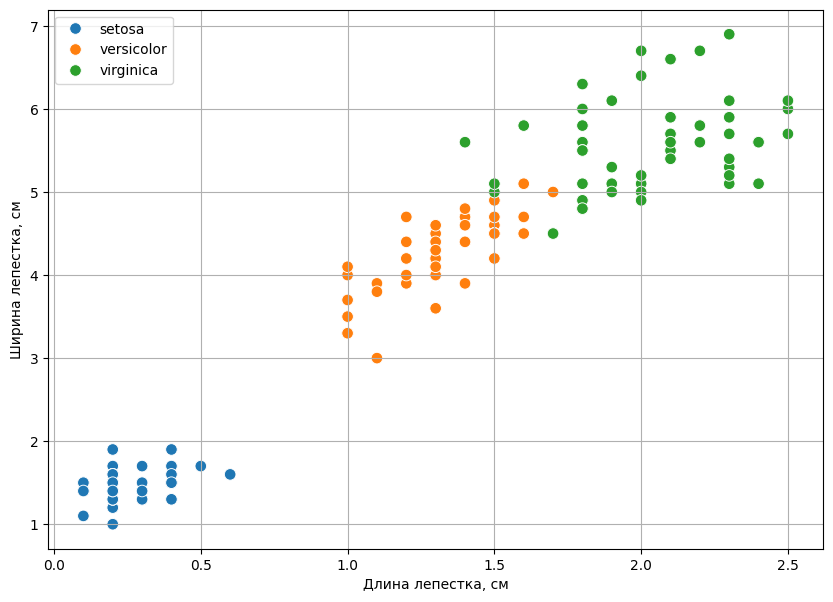

In [41]:
#2.3.1 Задание Для предыдущего примера поэкспериментируйте с параметрами классификатора:
#1. Установите другое количество ближайших соседей (k = 1, 5, 10).
#2. Установите размер тестовой выборки 15% от всего датасета.
#3. Постройте графики и оцените качество моделей, проанализируйте результаты.

iris = sns.load_dataset('iris')

x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1], test_size=0.15)
x_train.shape,  x_test.shape, y_train.shape, y_test.shape
print(x_train.head())
print(y_train.head())

model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=iris, 
    x = 'petal_width', y = 'petal_length', 
    hue='species', 
    s=70)

plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(x_test.iloc[i,3],x_test.iloc[i,2], color='red', s=150  )

print(f'accuracy: {accuracy_score(y_test, y_pred):.3}')


In [49]:
#3.3.2 Задание Определите набор признаков человека, по аналогии из РТ 1, – например,
#цвет глаз и конвертируйте его в матрицу признаков

data_dict = [{"карий": 3, "голубой":24, "серый":133}, 
            {"карий": 2, "зеленый":13, "серый":1},
            {"зеленый": 2, "голубой":3, "серый":10},
            {"карий": 1, "голубой":24, "зеленый":6}]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features

array([[ 24.,   0.,   3., 133.],
       [  0.,  13.,   2.,   1.],
       [  3.,   2.,   0.,  10.],
       [ 24.,   6.,   1.,   0.]])